<a href="https://colab.research.google.com/github/kakou34/map-coloring-csp/blob/master/val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import cv2 as cv
from google.colab.patches import cv2_imshow

In [3]:
def show_segmentation_results(img, groundtruth, segmentation, alpha):
  
  groundtruth_inverse = np.logical_not(groundtruth)
  segmentation_inverse = np.logical_not(segmentation)

  TP = np.logical_and(groundtruth, segmentation) # Both are 1
  TN = np.logical_and(groundtruth_inverse, segmentation_inverse) # Both are 0
  FP = np.logical_and(groundtruth_inverse, segmentation) # GT = 0 (so !GT=1) and Seg = 1
  FN = np.logical_and(groundtruth, segmentation_inverse) # GT = 1 and Seg = 0 (So !Seg = 1)

  # If the image has 1 Channel, convert to RGB
  if(len(img.shape)<3):
    img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)

  # Assign a color for each of TP, TN, FP, FN
  mask = np.zeros_like(img)
  mask[TP] = (0, 255, 0) # Green for TP
  mask[TN] = (0, 0, 0)   # Black for TN
  mask[FP] = (0, 255, 165) # Orange for FP
  mask[FN] = (0, 0, 255) # Red for FN

  result = cv.addWeighted(img, alpha, mask, 1 - alpha, 0)
  cv2_imshow(img)
  cv2_imshow(mask)
  cv2_imshow(result)

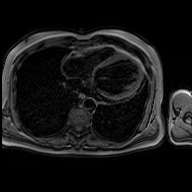

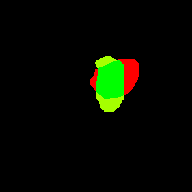

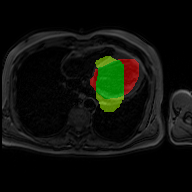

In [8]:
img = cv.imread('img.png', cv.IMREAD_GRAYSCALE)

gt = cv.imread('mask.png', cv.IMREAD_GRAYSCALE)
_, gt = cv.threshold(gt, 127, 255, cv.THRESH_BINARY)

pred = cv.imread('pred.png', cv.IMREAD_GRAYSCALE)


show_segmentation_results(img, gt, pred, 0.5)